이번 절에서는 합성곱 층이 이미지에서 어떤 것을 학습했는지 알아보기 위해 합성곱 층의 가중치와 특성 맵을 그림으로 시각화해 본다.  
이를 통해 합성곱 신경망의 동작 원리에 대한 통찰을 키워보자.  
  
케라스의 함수형 API가 무엇인지 살펴보고 합성곱 층의 특성 맵을 시각화하는 데 사용해 보자.  
이 절에서는 2절에서 훈련했던 합성곱 신경망의 체크포인트 파일을 사용한다. 이 파일은 최적의 에포크까지 훈련한 모델 파라미터를 가지고 있다.

### 가중치 시각화  
합성곱 층은 여러개의 필터를 사용해 이미지에서 특징을 학습한다. 각 필터는 커널이라 부르는 가중치와 절편을 가지고 있다. 일반적으로 절편은 시각적으로 의미가 있지 않다.  
가중치는 입력 이미지의 2차원 영역에 적용되어 어떤 특징을 크게 두드러지게 표현하는 역할을 한다.  
  
예를 들어 다음과 같은 가중치는 둥근 모서리가 있는 영역에서 크게 활성화되고 그렇지 않은 영역에서는 낮은 값을 만들 것이다.  
  
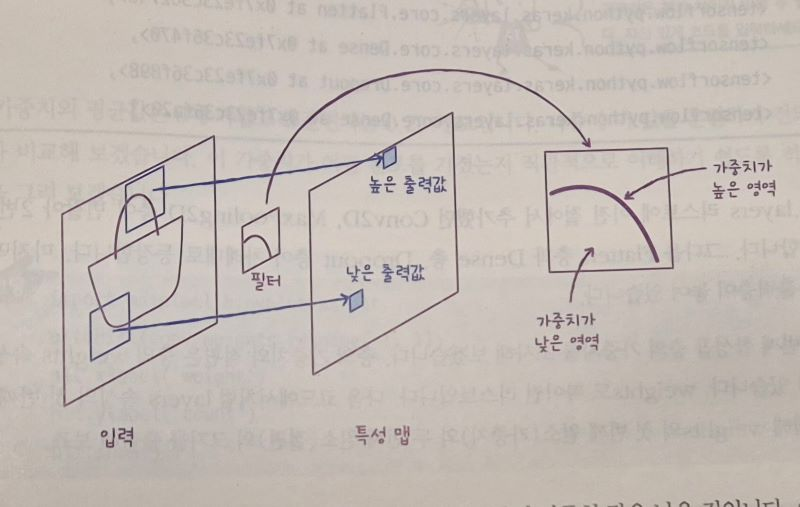  
  
이 필터의 가운데 곡선 부분의 가중치 값은 높고 그 외 부분의 가중치 값은 낮을 것이다. 이렇게 해야 둥근 모서리가 있는 입력과 곱해져서 큰 출력을 만들기 때문이다.  
  
2절에서 만든 모델이 어떤 가중치를 학습했는지 확인하기 위해 체크포인트 파일을 읽어 들이자.

In [1]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

케라스 모델에 추가한 층은 layers 속성에 저장되어 있다. 이 속성은 파이썬 리스트이다.

In [2]:
model.layers

model.layers 리스트에 이전 절에서 추가했던 Conv2D, MaxPooling2D 층이 번갈아 2번 연속 등장한다. 그 다음 Flatten 층과 Dense 층, Dropout 층이 차례대로 나타난다. 마지막에는 Dense 출력층이 있다.  
  
첫 번째 합성곱 층의 가중치를 알아보자.  
층의 가중치와 절편은 층의 weights 속성에 저장되어 있다. weights도 파이썬 리스트이다. 다음 코드에서처럼 layers 속성의 첫 번째 원소를 선택해 weights의 첫 번째 원소(가중치)와 두 번째 원소(절편)의 크기를 출력해 보자.

In [3]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


이전 절에서 커널 크기를 (3,3)으로 지정했었다. 이 합성곱 층에 전달되는 입력의 깊이가 1이므로 실제 커널 크기는 (3,3,1)이다.  
또 필터 개수가 32개이므로 weights의 첫 번째 원소인 가중치의 크기는 (3,3,1,32)가 되었다. weights의 두 번째 원소는 절편의 개수를 나타낸다. 필터마다 1개의 절편이 있으므로 (32,) 크기가 된다.  
  
weights 속성은 텐서플로의 다차원 배열인 Tensor 클래스의 객체이다. 여기서는 다루기 쉽도록 numpy() 메서드를 사용해 넘파이 배열로 변환한다. 그다음 가중치 배열의 평균과 표준편차를 넘파이 mean() 메서드와 std() 메서드로 계산한다.

In [5]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.02610401 0.2575087
